### Anime_Rating  ML Model

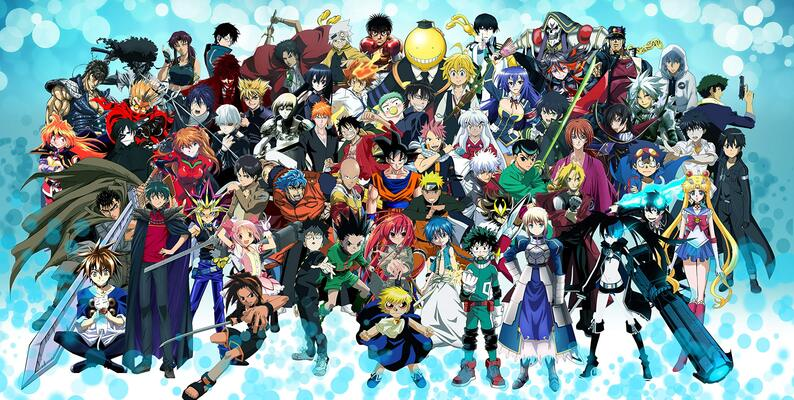

In [2]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = 'Anime.jpg'  # Update this with the actual path to your image file

# Display the image
display(Image(filename=image_path))



### Problem Statement: 

Develop a predictive model to estimate the popularity of TV shows using relevant features, providing valuable insights for understanding viewer engagement.

### Context:

This dataset appears to capture details about different media titles, providing a comprehensive overview of their attributes and characteristics.













































































































































































































































































































































1.title: The title of the content.
    
2.mediaType: Type of media, which might indicate if it's a movie, series, etc.
    
3.eps: Number of episodes (applicable for series).
    
4.duration: Duration of the content.
    
5.startYr: The year the content started.
    
6.finishYr: The year the content finished.
    
7.description: Description or summary of the content (where available).
    
8.contentWarn: Any content warning associated with the media.
    
9.watched: Number of times watched.
    
10.watching: Number of people currently watching.
    
11.rating: Rating score of the content.
    
12.votes: Number of votes or ratings received.
    
13.studio_primary: Primary studio producing the content.
    
14.studios_colab: Collaborating studios or partners.
    
15.genre: Genre or category of the content.

In [ ]:
# get access your google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/Imarticus/Stats

/gdrive/MyDrive/Imarticus/Stats


In [7]:
#  imports essential libraries for data manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn), and configures Matplotlib for inline plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load your InsuranceLosses  dataset
data=pd.read_csv("anime_ratings_data (2).csv")

In [9]:
# Let us make another copy of data
df=data.copy()

In [10]:
 # Display first five rows of dataframe
df.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [11]:
 # Display Last five rows of dataframe
df.tail()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
6518,"Watamote: No Matter How I Look at It, It's You...",TV,12,5.0,2013,2013,"Tomoko Kuroki is eager to begin her new, glamo...",No,4649,199,3.633,3100.0,Others,No,Other
6519,Eight Clouds Rising,OVA,2,44.5,1997,1997,Kuraki has taken his grandfather’s ancient swo...,No,341,9,2.573,208.0,Studio Pierrot,No,Other
6520,Ishifuro: Ryuu no Tani to Taiyou no Toride,Music Video,1,4.0,2016,2016,NaN,No,25,0,1.749,14.0,Others,No,Other
6521,Sword Art Online: Alicization,TV,24,7.5,2018,2019,"Kirito awakens in a vast, fantastical forest f...",Yes,4649,199,4.145,3100.0,A-1 Pictures,No,Other
6522,xxxHOLiC Kei,TV,13,12.0,2008,2008,"Watanuki, who is able to see the spirit world,...",No,4649,199,4.399,3100.0,Production I.G,No,Other


In [12]:
# Display size of dataframe
df.size

97845

In [13]:
# Checking the column names
df.columns

Index(['title', 'mediaType', 'eps', 'duration', 'startYr', 'finishYr',
       'description', 'contentWarn', 'watched', 'watching', 'rating', 'votes',
       'studio_primary', 'studios_colab', 'genre'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


### Observations :

There are 6523 rows and 14 columns. There are 7 independent object variable, 8 numerical independent variable and dependent
variable is of int64 type.

In [15]:
# Column name has some spaces fix them
df.columns = [col.replace(' ','_') for col in df.columns]

In [16]:
df.isna().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

### Statistical Summary

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,6523.0,8.716235,11.002479,1.000,1.000,1.000,12.000,34.000
duration,6248.0,18.396287,20.949350,1.000,5.000,7.000,25.000,67.000
startYr,6523.0,2005.241147,12.911035,1967.000,2000.000,2010.000,2015.000,2020.000
finishYr,6523.0,2005.575349,12.568169,1970.000,2000.000,2010.000,2015.000,2020.000
watched,6523.0,1347.948643,1737.138112,5.000,56.000,349.000,2252.500,4649.000
watching,6523.0,57.445654,76.527405,0.000,2.000,13.000,98.000,199.000
rating,6523.0,2.962553,0.760486,1.111,2.371,2.944,3.568,4.702
votes,6496.0,906.253233,1171.677648,10.000,34.000,227.500,1567.750,3100.000


In [18]:
df.describe(include='object').T

,count,unique,top,freq
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1
mediaType,6496,8,TV,2145
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3
contentWarn,6523,2,No,5825
studio_primary,6523,11,Others,4684
studios_colab,6523,2,No,6210
genre,6523,9,Other,5468


 ### Dealing with Catagorical columns

In [19]:
# Dealing with object columns first
object_columns = df.select_dtypes('object').columns
object_columns

Index(['title', 'mediaType', 'description', 'contentWarn', 'studio_primary',
       'studios_colab', 'genre'],
      dtype='object')

In [20]:
df["title"].nunique()

6523

In [21]:
df["title"].value_counts()

title
Dragon Ball Z Movie 15: Resurrection 'F'                1
Sin in the Rain                                         1
Me! Me! Me! Chronic                                     1
YanYan Machiko                                          1
Peach Girl                                              1
                                                       ..
Fojiao Donghua: Dashi Zhi Pusa Nianfo Yuantong Zhang    1
Noblesse: Awakening                                     1
Umacha                                                  1
Meiji Tokyo Renka                                       1
xxxHOLiC Kei                                            1
Name: count, Length: 6523, dtype: int64

In [22]:
# Since it is a unique column we can drop it
df.drop("title",axis=1,inplace=True)

In [23]:
df["mediaType"].value_counts()

mediaType
TV             2145
Movie          1085
OVA             933
Music Video     674
Web             590
DVD Special     457
Other           320
TV Special      292
Name: count, dtype: int64

Text(0, 0.5, 'count')

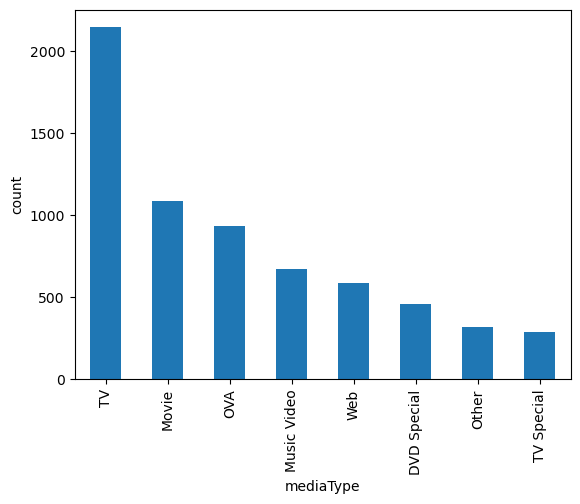

In [24]:
df['mediaType'].value_counts().plot(kind='bar')
plt.xlabel('mediaType')
plt.ylabel('count')

In [25]:
df["description"].unique()

array(['Even the complete obliteration of his physical form can’t stop the galaxy’s most evil overlord. After years in spiritual purgatory, Frieza has been resurrected and plans to take his revenge on the Z-Fighters of Earth. Facing off against Frieza’s powerful new form, and his army of 1,000 soldiers, Goku and Vegeta must reach new levels of strength in order to protect Earth from their vengeful nemesis.',
       nan,
       "The story is set during the spring vacation immediately after Mao and the others graduate. As the season turns and sakura flowers bloom, Kyōya is once again suddenly stuffed into a bag. When he is let out of the bag, Kyoya looks around and sees New York — except the room looks exactly like the GJ\xa0Club's room.",
       ...,
       'Kuraki has taken his grandfather’s ancient sword to the Shinnagi festival for an ancient cleansing ritual, and finds himself inexplicably drawn to a beautiful shrine maiden. As night falls, the priestess is revealed to be Nanachi, t

In [26]:
df["description"].nunique()

4081

In [27]:
# Since it is a unique column we can drop it
df.drop("description",axis=1,inplace=True)

In [28]:
df["contentWarn"].nunique()

2

In [29]:
df["contentWarn"].unique()

array(['No', 'Yes'], dtype=object)

Text(0, 0.5, 'count')

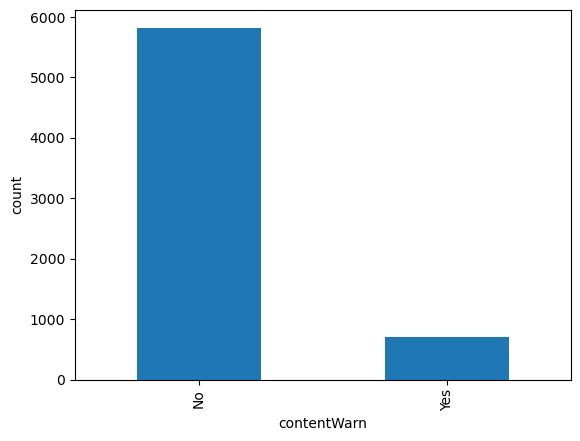

In [30]:
df['contentWarn'].value_counts().plot(kind='bar')
plt.xlabel('contentWarn')
plt.ylabel('count')

In [31]:
df["studio_primary"].nunique()

11

In [32]:
df["studio_primary"].unique()

array(['Toei Animation', 'Others', 'J.C. Staff', 'A-1 Pictures',
       'Production I.G', 'Sunrise', 'TMS Entertainment', 'Studio Pierrot',
       'Studio Deen', 'OLM', 'MADHOUSE'], dtype=object)

In [33]:
df["studio_primary"].value_counts()

studio_primary
Others               4684
Toei Animation        377
Sunrise               255
TMS Entertainment     196
J.C. Staff            195
MADHOUSE              173
Production I.G        159
Studio Deen           139
A-1 Pictures          121
OLM                   113
Studio Pierrot        111
Name: count, dtype: int64

Text(0, 0.5, 'count')

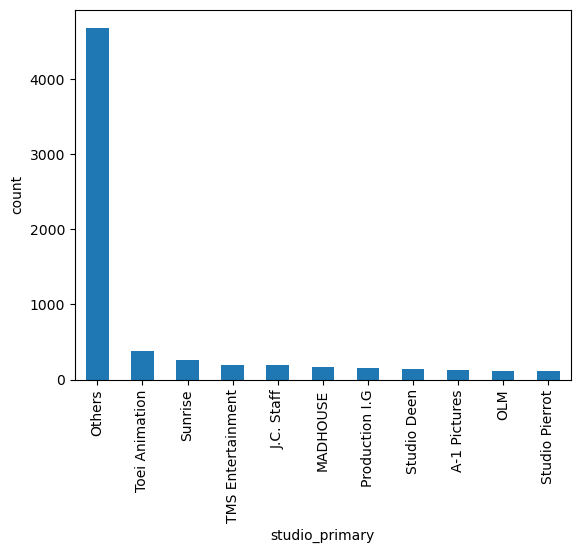

In [34]:
df['studio_primary'].value_counts().plot(kind='bar')
plt.xlabel('studio_primary')
plt.ylabel('count')

In [35]:
df["studios_colab"].value_counts()

studios_colab
No     6210
Yes     313
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

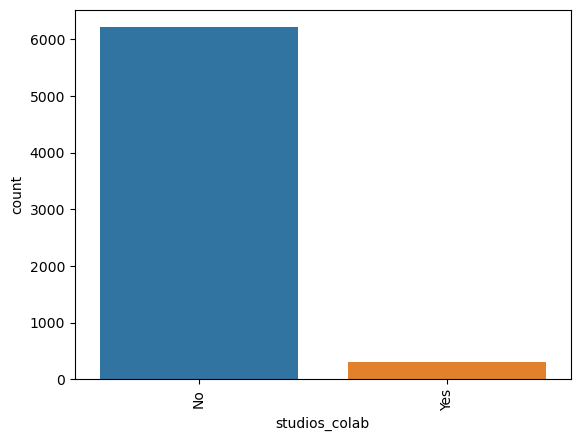

In [36]:
# Plotting a bar chart using Seaborn
sns.countplot(x="studios_colab", data=df)
plt.xticks(rotation=90)

In [37]:
df["genre"].unique()

array(['Other', 'Drama', 'Adventure', 'Sci Fi', 'Comedy',
       'Based on a Manga', 'Action', 'Romance', 'Fantasy'], dtype=object)

In [38]:
df["genre"].nunique()

9

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Sci Fi'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Based on a Manga'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'Fantasy')])

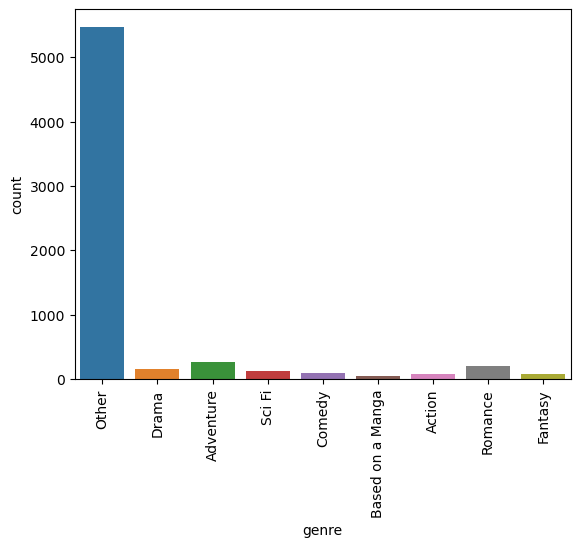

In [39]:
# Plotting a bar chart using Seaborn
sns.countplot(x="genre", data=df)
plt.xticks(rotation=90)

# Dealing with numerical  columns

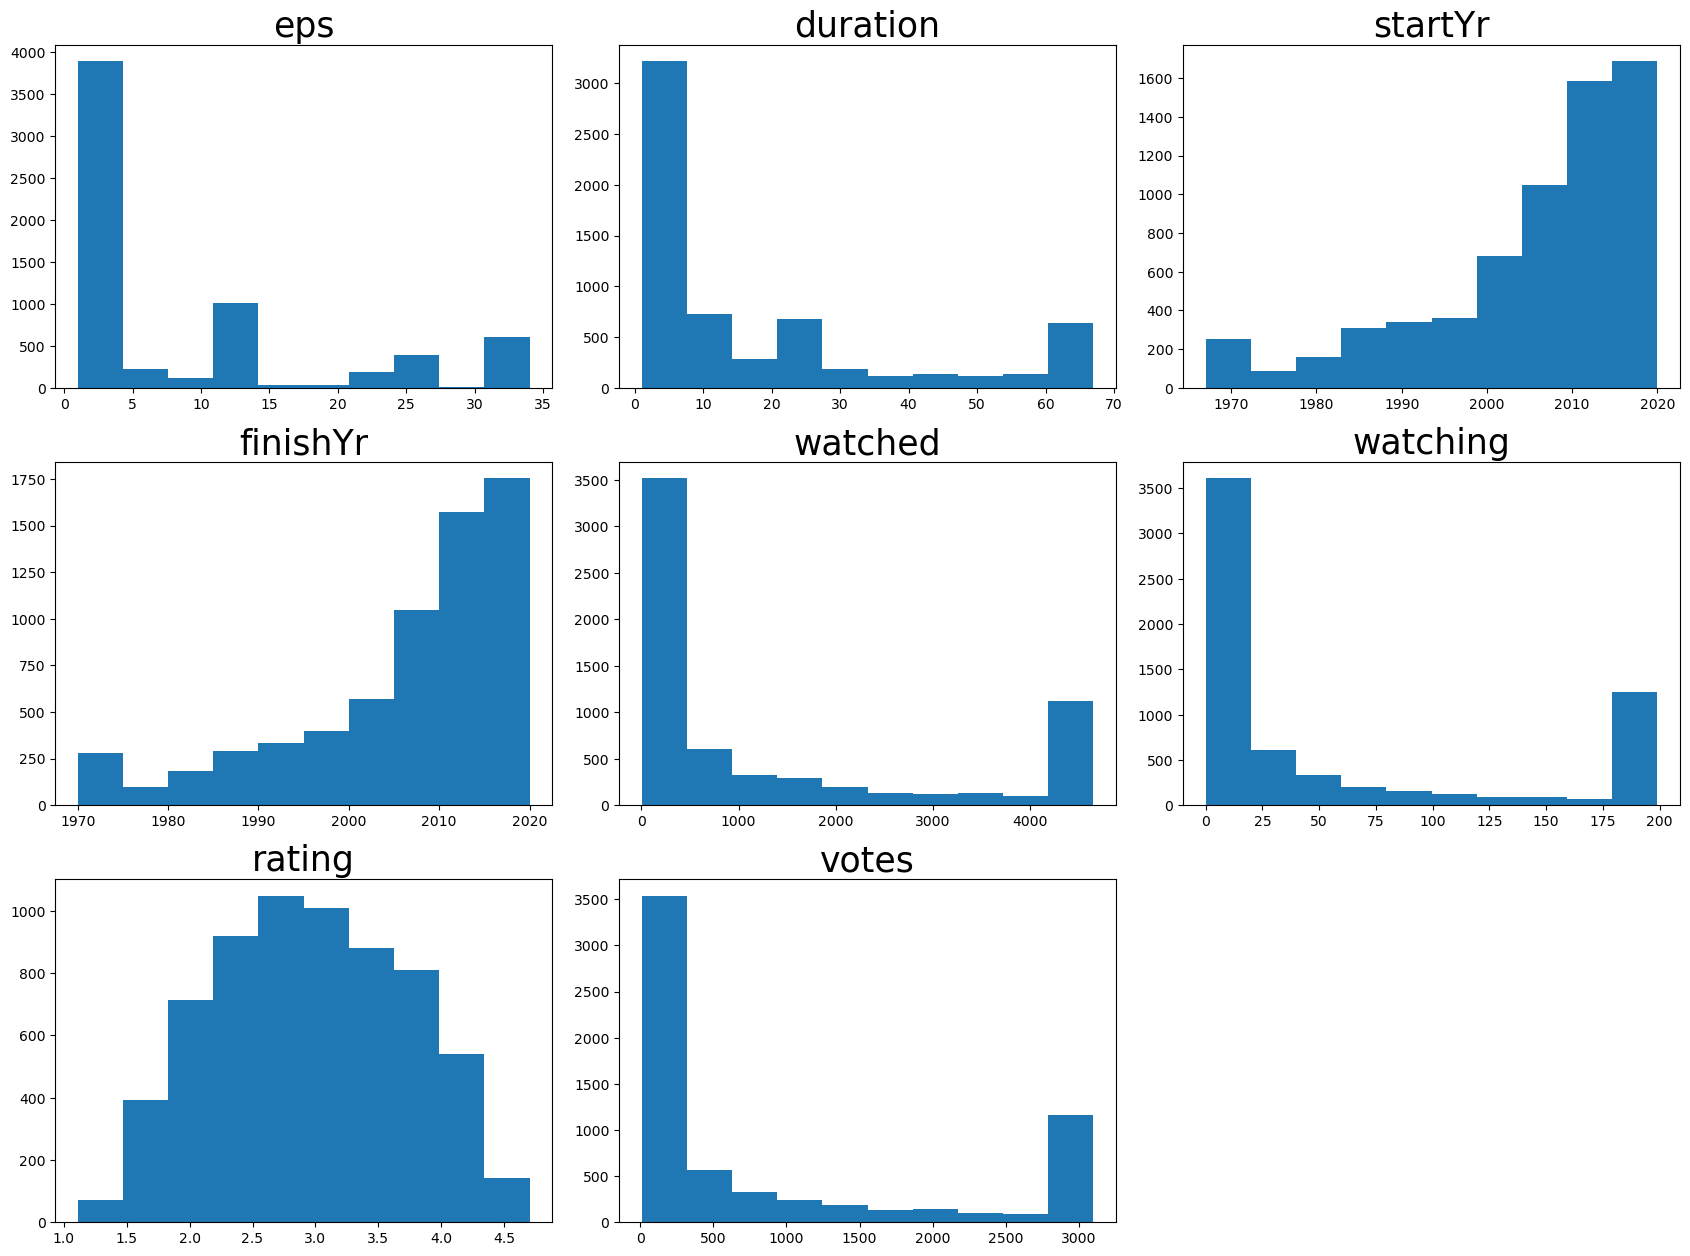

In [40]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

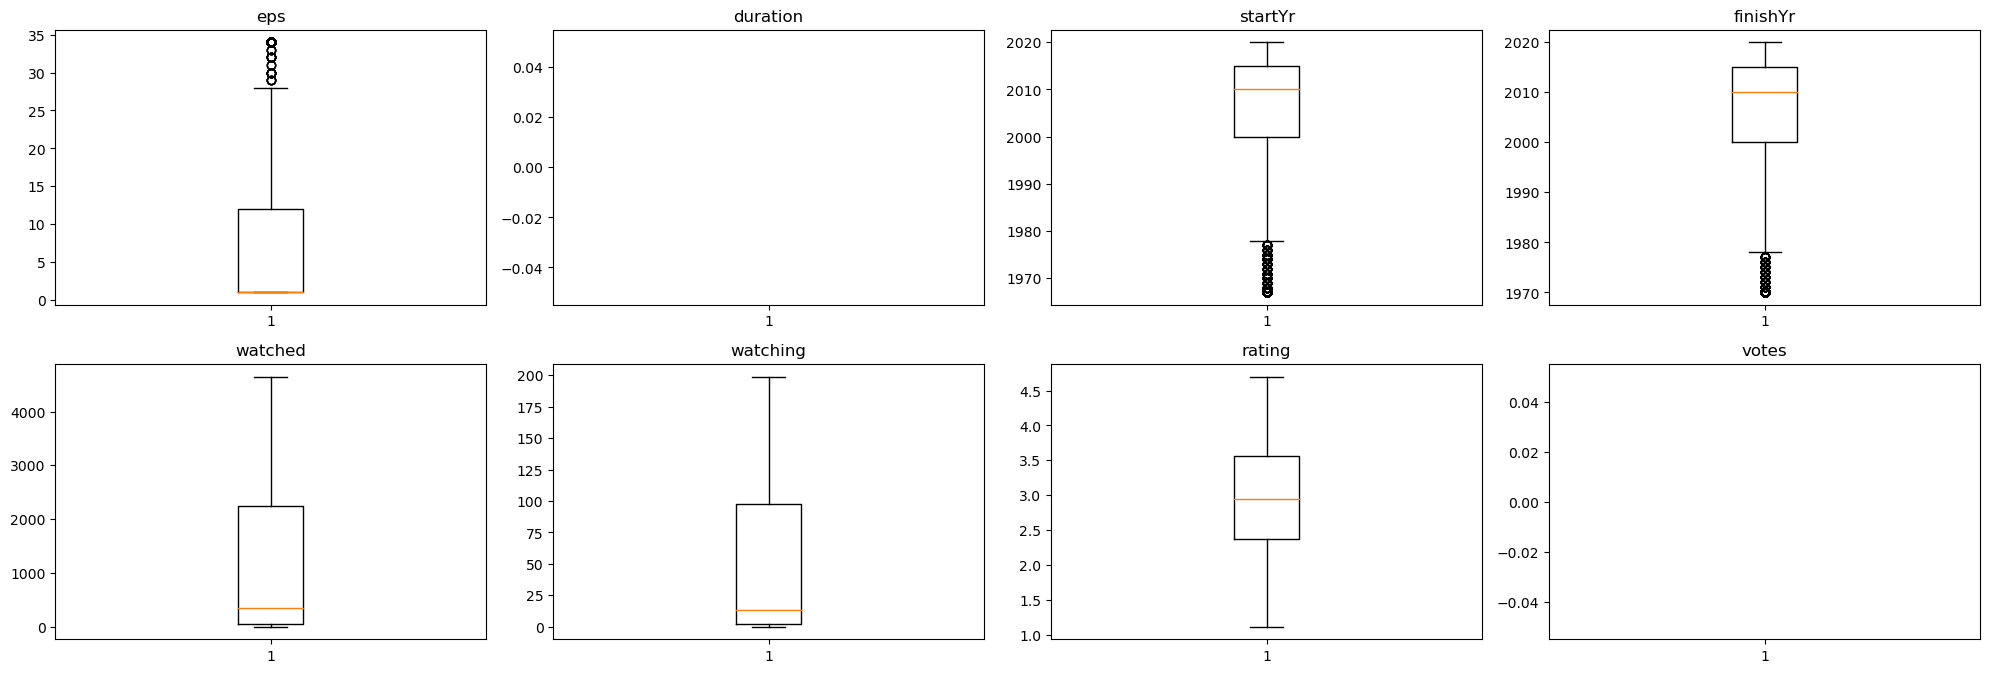

In [41]:
#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [42]:
df.columns

Index(['mediaType', 'eps', 'duration', 'startYr', 'finishYr', 'contentWarn',
       'watched', 'watching', 'rating', 'votes', 'studio_primary',
       'studios_colab', 'genre'],
      dtype='object')

In [43]:
df.eps.unique()

array([ 1, 26,  2, 13, 34, 12, 25,  5,  9, 10,  3,  4, 16, 23,  7,  6, 24,
       11, 20, 32, 15, 22, 17,  8, 18, 21, 30, 33, 27, 29, 14, 19, 31, 28],
      dtype=int64)

In [44]:
df.eps.nunique()

34

In [45]:
df['eps'].value_counts()

eps
1     3272
12     617
34     596
13     339
2      283
26     278
3      181
4      150
6      149
24     128
25     106
10      68
5       49
8       40
11      39
7       33
22      28
23      27
20      25
16      22
9       15
15      12
14      10
30       9
27       8
32       8
21       8
29       5
18       5
33       4
31       3
28       3
17       2
19       1
Name: count, dtype: int64

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

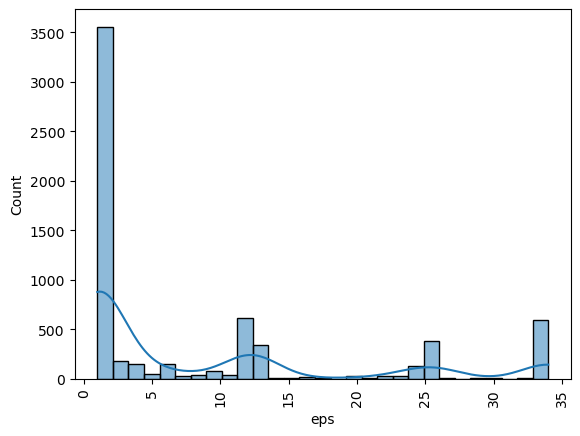

In [46]:
# Plotting a histogram with distribution using Seaborn
sns.histplot(x="eps", data=df, kde=True)
plt.xticks(rotation=90)

In [47]:
# Check the skewness of eps.
df["eps"].skew()

1.265865570692348

In [48]:
# Normalizing using log transform
df['eps'] = np.log(df['eps'])

<Axes: xlabel='eps', ylabel='Count'>

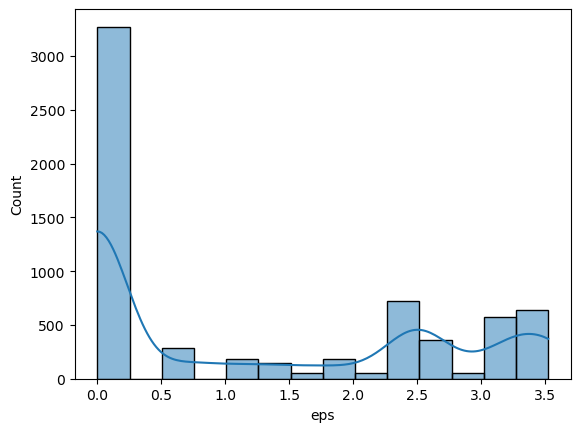

In [49]:
# Plotting a histogram with distribution using Seaborn
sns.histplot(x="eps", data=df, kde=True)

<Axes: >

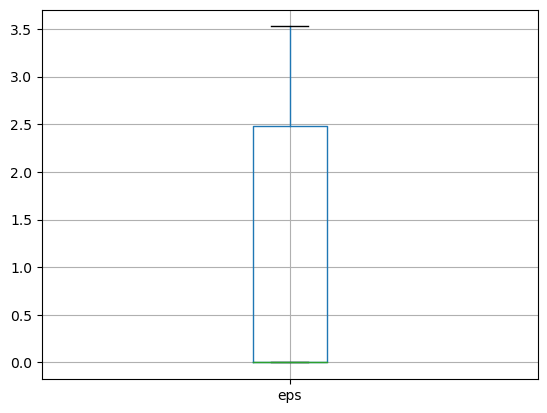

In [50]:
# Checking for outliers
df.boxplot(column='eps')

In [51]:
df.duration.unique()

array([67. ,  5. , 46. ,  4. ,  3. , 11. , 50. ,  6. ,  1. , 45.5, 26. ,
       25. , 18. ,  2. , 24. ,  8. , 29. , 16. , 20. , 15. , 21. , 14. ,
       45. , 40. , 34. , 10. ,  nan, 12. , 47. , 59. , 22. , 38. ,  7. ,
       60. , 30. ,  9.5, 17. , 51. , 31. , 66. , 48. , 23. , 52. ,  9. ,
       56. , 32.5, 65. , 55. , 19. , 41. , 49. , 27. , 28. , 13. , 37. ,
       35. , 32. , 13.5, 41.5, 36.5, 44. ,  7.5, 16.5,  2.5, 23.5, 53. ,
       33. , 24.5, 58. , 43. , 25.5, 42. , 61. ,  3.5, 39. , 44.5, 47.5,
       57. , 64. , 36. , 62. , 11.5, 50.5,  6.5, 54. ,  8.5, 63. , 30.5,
        5.5])

In [52]:
df.duration.nunique()

88

In [53]:
df["duration"].value_counts()

duration
5.0     1302
67.0     610
4.0      556
3.0      371
2.0      324
        ... 
41.5       1
13.5       1
8.5        1
30.5       1
5.5        1
Name: count, Length: 88, dtype: int64

In [54]:
# Check the skewness of "duration"
df["duration"].skew()

1.3707440078465825

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

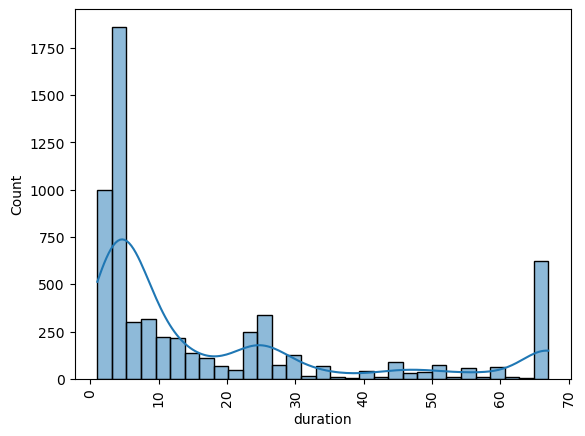

In [55]:
# Plotting a histogram with distribution using Seaborn
sns.histplot(x="duration", data=df, kde=True)
plt.xticks(rotation=90)

In [56]:
# Using log transform
df['duration'] = np.log(df['duration'])

<Axes: xlabel='duration', ylabel='Count'>

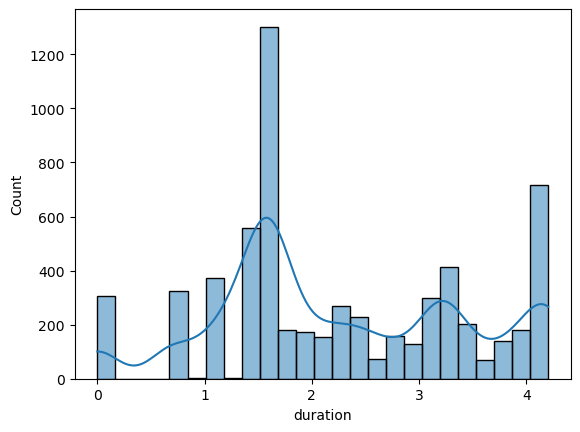

In [57]:
# Plotting a histogram with distribution using Seaborn
sns.histplot(x="duration", data=df, kde=True)

<Axes: >

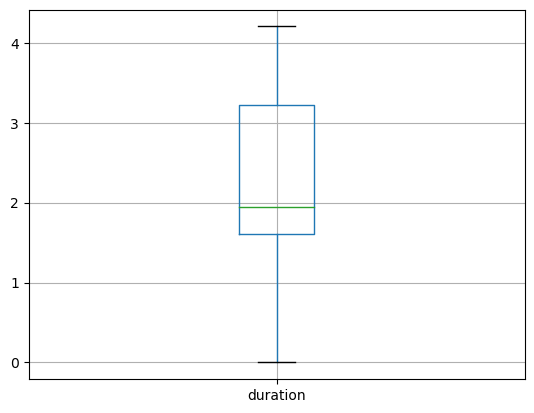

In [58]:
# Checking for outliers
df.boxplot(column='duration')

In [59]:
df.startYr.unique()

array([2015, 2008, 2014, 1984, 2019, 2005, 2012, 2010, 1992, 2016, 1986,
       1978, 1995, 2004, 2011, 2017, 1985, 2013, 1989, 1976, 1967, 2001,
       2018, 1999, 1991, 2002, 1994, 2009, 1997, 2007, 1998, 1993, 1977,
       2006, 1968, 1969, 1981, 1982, 2000, 1971, 2003, 1990, 1988, 2020,
       1972, 1996, 1973, 1980, 1983, 1987, 1974, 1979, 1975, 1970],
      dtype=int64)

In [60]:
# Check the skewness of "startYr"
df["startYr"].skew()

-1.3265572492384936

In [61]:
# Assuming 'startYr' is the column you want to perform log1p on
df['startYr'] = np.log1p(df['startYr'])

<Axes: xlabel='startYr', ylabel='Density'>

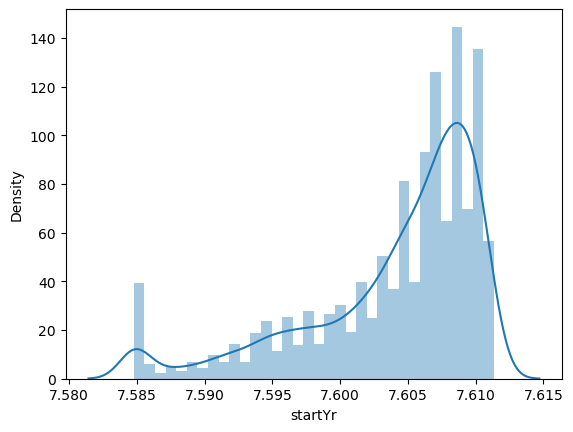

In [62]:

sns.distplot(df["startYr"])

In [63]:
# Check the skewness of startYr
df["startYr"].skew()

-1.3397431988489388

In [64]:
df["startYr"]=np.sqrt(df["startYr"])

In [65]:
# Check the skewness of startYr
df["startYr"].skew()

-1.3406130608845774

In [66]:
df.finishYr.unique()

array([2015, 2008, 2014, 1984, 2019, 2005, 2012, 2010, 1994, 2016, 1986,
       1979, 1995, 2017, 2011, 1985, 2013, 1989, 1977, 1970, 2001, 2018,
       1999, 1991, 2004, 2002, 2003, 2009, 1998, 1987, 1997, 2007, 2006,
       1982, 1976, 1996, 2000, 1992, 1981, 1971, 1990, 2020, 1972, 1973,
       1988, 1980, 1993, 1983, 1975, 1978, 1974], dtype=int64)

In [67]:
df.finishYr.nunique()

51

In [68]:
# Check the skewness of finishYr 
df["finishYr"].skew()

-1.2722775564097424

In [69]:
# dropping fiishYr and startYr
df.drop(['finishYr','startYr'],axis=1,inplace=True)

In [70]:
df.watched.unique()

array([4649,   10, 1630, ..., 2934, 2101,  389], dtype=int64)

In [71]:
df.watched.nunique()

1912

In [72]:
df["watched"].value_counts()

watched
4649    1032
20        73
24        66
29        60
23        54
        ... 
1306       1
1855       1
3509       1
3217       1
389        1
Name: count, Length: 1912, dtype: int64

<Axes: xlabel='watched', ylabel='Count'>

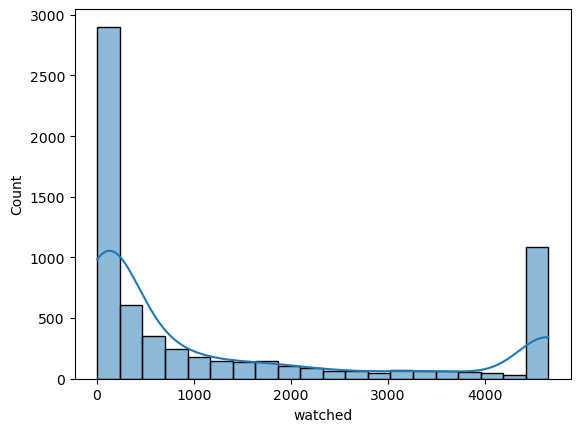

In [73]:
# Plotting a histogram with distribution using Seaborn
sns.histplot(x="watched", data=df, kde=True)

In [74]:
# Using log transform
df['watched'] = np.log(df['watched'])

<Axes: >

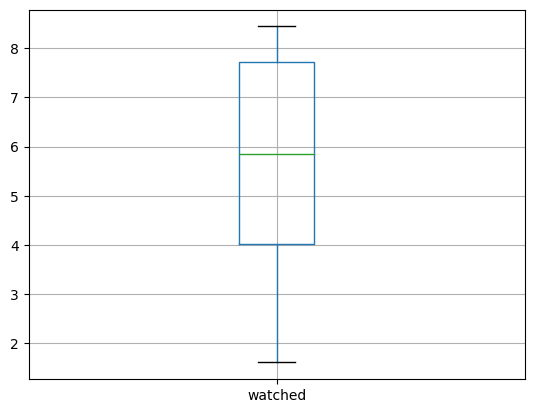

In [75]:
# Checking for outliers
df.boxplot(column='watched')

In [76]:
# Check the skewness of watched
df["watched"].skew()

-0.05477695861605677

In [77]:
# Dropping watched column as it has high correlation
#df.drop('watched',axis=1,inplace=True)

In [78]:
df.watching.unique()

array([ 86,   0,  16, 184,   8, 187,   1, 100, 199,  32,  19,   2,   9,
        15,  17, 120,  12,   3,  22, 188,  23,  30,   4,  95, 164,  14,
        77,  50,  10,  13,   6,   5,  83,   7, 111,  20, 118,  35,  91,
        51,  68,  24, 109, 179,  27,  61,  45, 102,  38,  11,  76, 113,
       165,  29,  94,  34,  52,  63,  42,  54, 127,  72,  39, 169,  47,
       138,  81,  36,  87, 105,  28,  88,  25,  53, 126,  26, 125,  18,
       114, 133,  37,  33,  59,  60, 153,  56, 143,  48, 147,  21, 128,
        89,  31, 106, 141,  67,  65,  43,  49, 185,  84,  64,  80,  62,
        40,  79, 151,  46, 149, 178,  97,  85,  90, 115,  41, 157,  74,
        73, 107,  66, 131,  57, 142, 139,  70, 110, 174, 154, 119,  93,
       163, 145, 129,  58, 158, 173, 136, 132,  44,  69, 196, 103, 152,
       167, 101, 162, 166,  96, 144, 195, 122, 176, 193, 198, 172, 108,
       150, 190,  82, 124,  92,  98, 116, 194, 112, 134, 137, 192, 155,
        55, 121, 146, 148, 171,  99,  75, 182, 180,  78, 123, 18

In [79]:
df.watching.nunique()

198

In [80]:
# Check the skewness of watching
df["watching"].skew()

1.0823201529798288

In [81]:
df["watching"].value_counts()

watching
199    1191
0       867
1       584
2       371
3       264
       ... 
160       1
171       1
181       1
168       1
177       1
Name: count, Length: 198, dtype: int64

<Axes: xlabel='watching', ylabel='Count'>

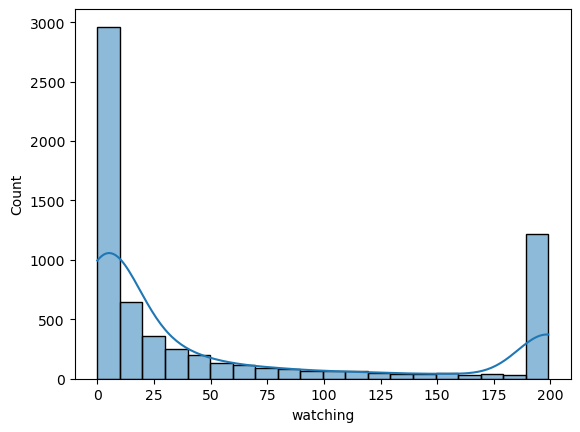

In [82]:
#  Plotting a histogram with distribution using Seaborn
sns.histplot(x="watching", data=df, kde=True)

In [83]:
# Using log1p transform
df['watching'] = np.log1p(df['watching'])

<Axes: xlabel='watching', ylabel='Count'>

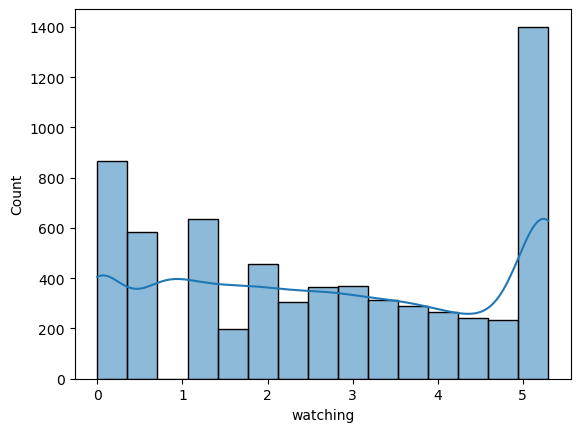

In [84]:
# Plotting a histogram with distribution using Seaborn
sns.histplot(x="watching", data=df, kde=True)

<Axes: >

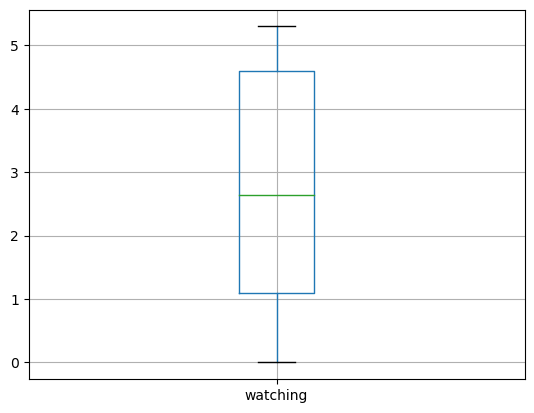

In [85]:
# Checking for outliers
df.boxplot(column='watching')

In [86]:
df.rating.unique()

array([3.979, 2.12 , 3.758, ..., 3.294, 4.452, 1.749])

In [87]:
df.rating.nunique()

2781

In [88]:
df["rating"].value_counts()

rating
2.382    6
2.344    6
2.490    6
2.911    6
2.649    6
        ..
1.300    1
4.247    1
4.342    1
4.612    1
1.749    1
Name: count, Length: 2781, dtype: int64

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0')])

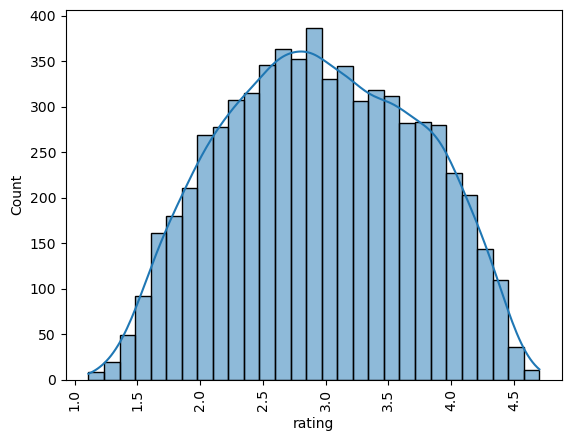

In [89]:
# Plotting a histogram with distribution using Seaborn
sns.histplot(x="rating", data=df, kde=True)
plt.xticks(rotation=90)

In [90]:
# Check the skewness of rating
df["rating"].skew()

0.002448621829103829

In [91]:
df.votes.unique()

array([3100.,   10., 1103., ..., 1725.,  423., 1909.])

In [92]:
df.votes.nunique()

1554

In [93]:
df["votes"].value_counts()

votes
3100.0    1075
10.0       131
12.0       113
13.0       112
11.0       112
          ... 
1240.0       1
955.0        1
692.0        1
1348.0       1
1909.0       1
Name: count, Length: 1554, dtype: int64

<Axes: xlabel='votes', ylabel='Count'>

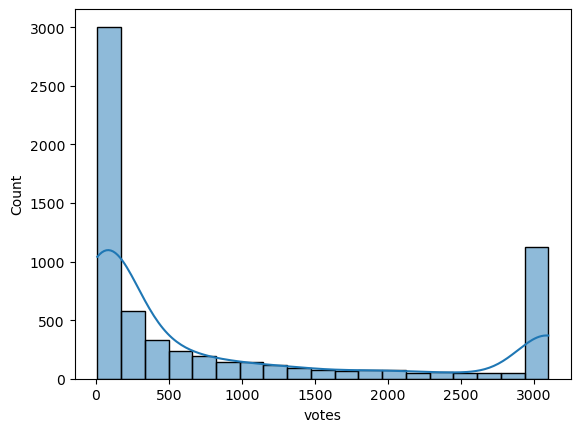

In [94]:
# Plottin a histogram with distribution using Seaborn
sns.histplot(x="votes", data=df, kde=True)

In [95]:
# Using lpg transform
df['votes'] = np.log(df['votes'])

<Axes: xlabel='votes', ylabel='Count'>

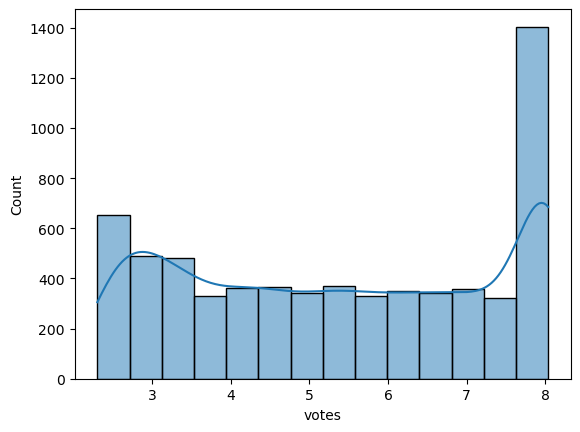

In [96]:
# Plotting a histogram with distribution using Seaborn
sns.histplot(x="votes", data=df, kde=True)

<Axes: >

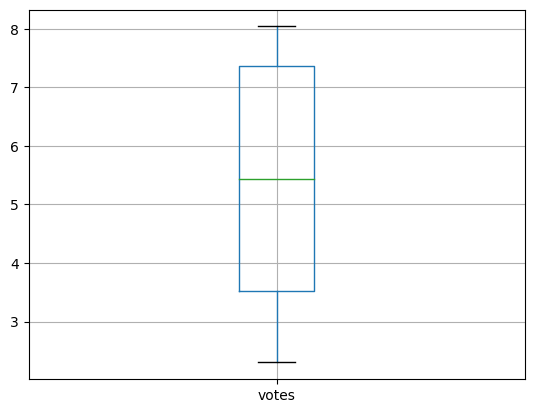

In [97]:
# Checking  for outliers
df.boxplot(column='votes')

In [98]:
# Check the skewness of votes
df["votes"].skew()

-0.040829310369658735

In [99]:
# Replace null values with the mode (most frequent value) of the column
mode_value = df['mediaType'].mode()[0]
df['mediaType'].fillna(mode_value, inplace=True)


In [100]:
# Replace null values with the mode (most frequent value) of the column
mode_value = df['mediaType'].mode()[0]
df['mediaType'].fillna(mode_value, inplace=True)

In [101]:
mean_value = df['duration'].mean()
# Use mean or median for replacement
df['duration'].fillna(mean_value, inplace=True)

In [102]:
median_value = df['duration'].mode().iloc[0]
df['duration'] = df['duration'].replace('Unknown', median_value)

In [103]:
mean_value = df['votes'].mean()
# Use mean or median for replacement
df['votes'].fillna(mean_value, inplace=True)

In [104]:
df.isnull().sum()

mediaType         0
eps               0
duration          0
contentWarn       0
watched           0
watching          0
rating            0
votes             0
studio_primary    0
studios_colab     0
genre             0
dtype: int64

In [105]:
df.dtypes

mediaType          object
eps               float64
duration          float64
contentWarn        object
watched           float64
watching          float64
rating            float64
votes             float64
studio_primary     object
studios_colab      object
genre              object
dtype: object

In [115]:
# # creating dummy variables for object columns
object_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=object_columns, drop_first=True)

In [111]:
# USing one hot encoding for all the object  columns
#df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)

In [116]:

df

,eps,duration,watched,watching,rating,votes,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,0.000000,4.204693,8.444407,4.465908,3.979,8.039157,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,0.000000,1.609438,2.302585,0.000000,2.120,2.302585,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.000000,3.828641,7.396335,2.833213,3.758,7.005789,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.000000,4.204693,8.444407,5.220356,4.444,8.039157,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.000000,1.386294,5.846439,2.197225,2.494,5.455321,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,2.484907,1.609438,8.444407,5.298317,3.633,8.039157,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6519,0.693147,3.795489,5.831882,2.302585,2.573,5.337538,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6520,0.000000,1.386294,3.218876,0.000000,1.749,2.639057,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
6521,3.178054,2.014903,8.444407,5.298317,4.145,8.039157,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [109]:
df.isnull().sum().sum()

0

In [117]:
correlation = df.corr()
correlation

,eps,duration,watched,watching,rating,votes,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
eps,1.000000,-0.280833,0.223377,0.496082,0.247136,0.253570,-0.397521,-0.298397,-0.187143,-0.131533,...,0.008750,0.102120,0.046931,-0.032979,-0.033022,0.026431,-0.011260,0.001984,-0.020916,-0.004826
duration,-0.280833,1.000000,0.260308,0.179175,0.420774,0.244904,0.463266,-0.293844,0.366965,-0.202919,...,0.141343,0.020741,0.160458,0.008743,-0.005955,0.110070,0.039868,-0.227323,0.056656,0.092213
watched,0.223377,0.260308,1.000000,0.868493,0.789025,0.993221,-0.003721,-0.307113,0.097156,-0.124287,...,0.000372,0.083620,-0.020613,-0.022684,-0.052689,0.074040,-0.013036,-0.037157,0.078271,0.000434
watching,0.496082,0.179175,0.868493,1.000000,0.778649,0.886295,-0.108554,-0.403524,0.019052,-0.139393,...,0.004718,0.127332,-0.025359,-0.017367,-0.056584,0.089812,-0.003577,-0.032262,0.066842,-0.002204
rating,0.247136,0.420774,0.789025,0.778649,1.000000,0.782274,0.084258,-0.292145,0.039705,-0.140364,...,0.049959,0.069901,0.014146,-0.000704,-0.051518,0.149161,-0.000214,-0.089795,0.061213,0.004233
votes,0.253570,0.244904,0.993221,0.886295,0.782274,1.000000,-0.014908,-0.317836,0.085284,-0.130091,...,-0.003977,0.088265,-0.023499,-0.022271,-0.059549,0.078831,-0.015493,-0.033310,0.076578,0.001185
mediaType_Movie,-0.397521,0.463266,-0.003721,-0.108554,0.084258,-0.014908,1.000000,-0.151630,-0.182486,-0.101454,...,0.138122,-0.034792,0.063558,-0.025097,0.012519,0.051077,-0.010852,-0.050892,-0.002242,0.008041
mediaType_Music Video,-0.298397,-0.293844,-0.307113,-0.403524,-0.292145,-0.317836,-0.151630,1.000000,-0.138683,-0.077102,...,-0.081916,-0.076211,-0.047251,0.004814,-0.025363,-0.042418,0.005899,0.071141,-0.024832,-0.015345
mediaType_OVA,-0.187143,0.366965,0.097156,0.019052,0.039705,0.085284,-0.182486,-0.138683,1.000000,-0.092792,...,-0.020497,0.008668,0.004001,0.039404,-0.046856,-0.013761,0.003827,-0.048878,0.075752,0.040068
mediaType_Other,-0.131533,-0.202919,-0.124287,-0.139393,-0.140364,-0.130091,-0.101454,-0.077102,-0.092792,1.000000,...,-0.025837,-0.024425,-0.029011,-0.019962,0.030296,-0.025673,-0.019647,0.049648,-0.027774,-0.021899


### Multicorrelation: 

<Axes: >

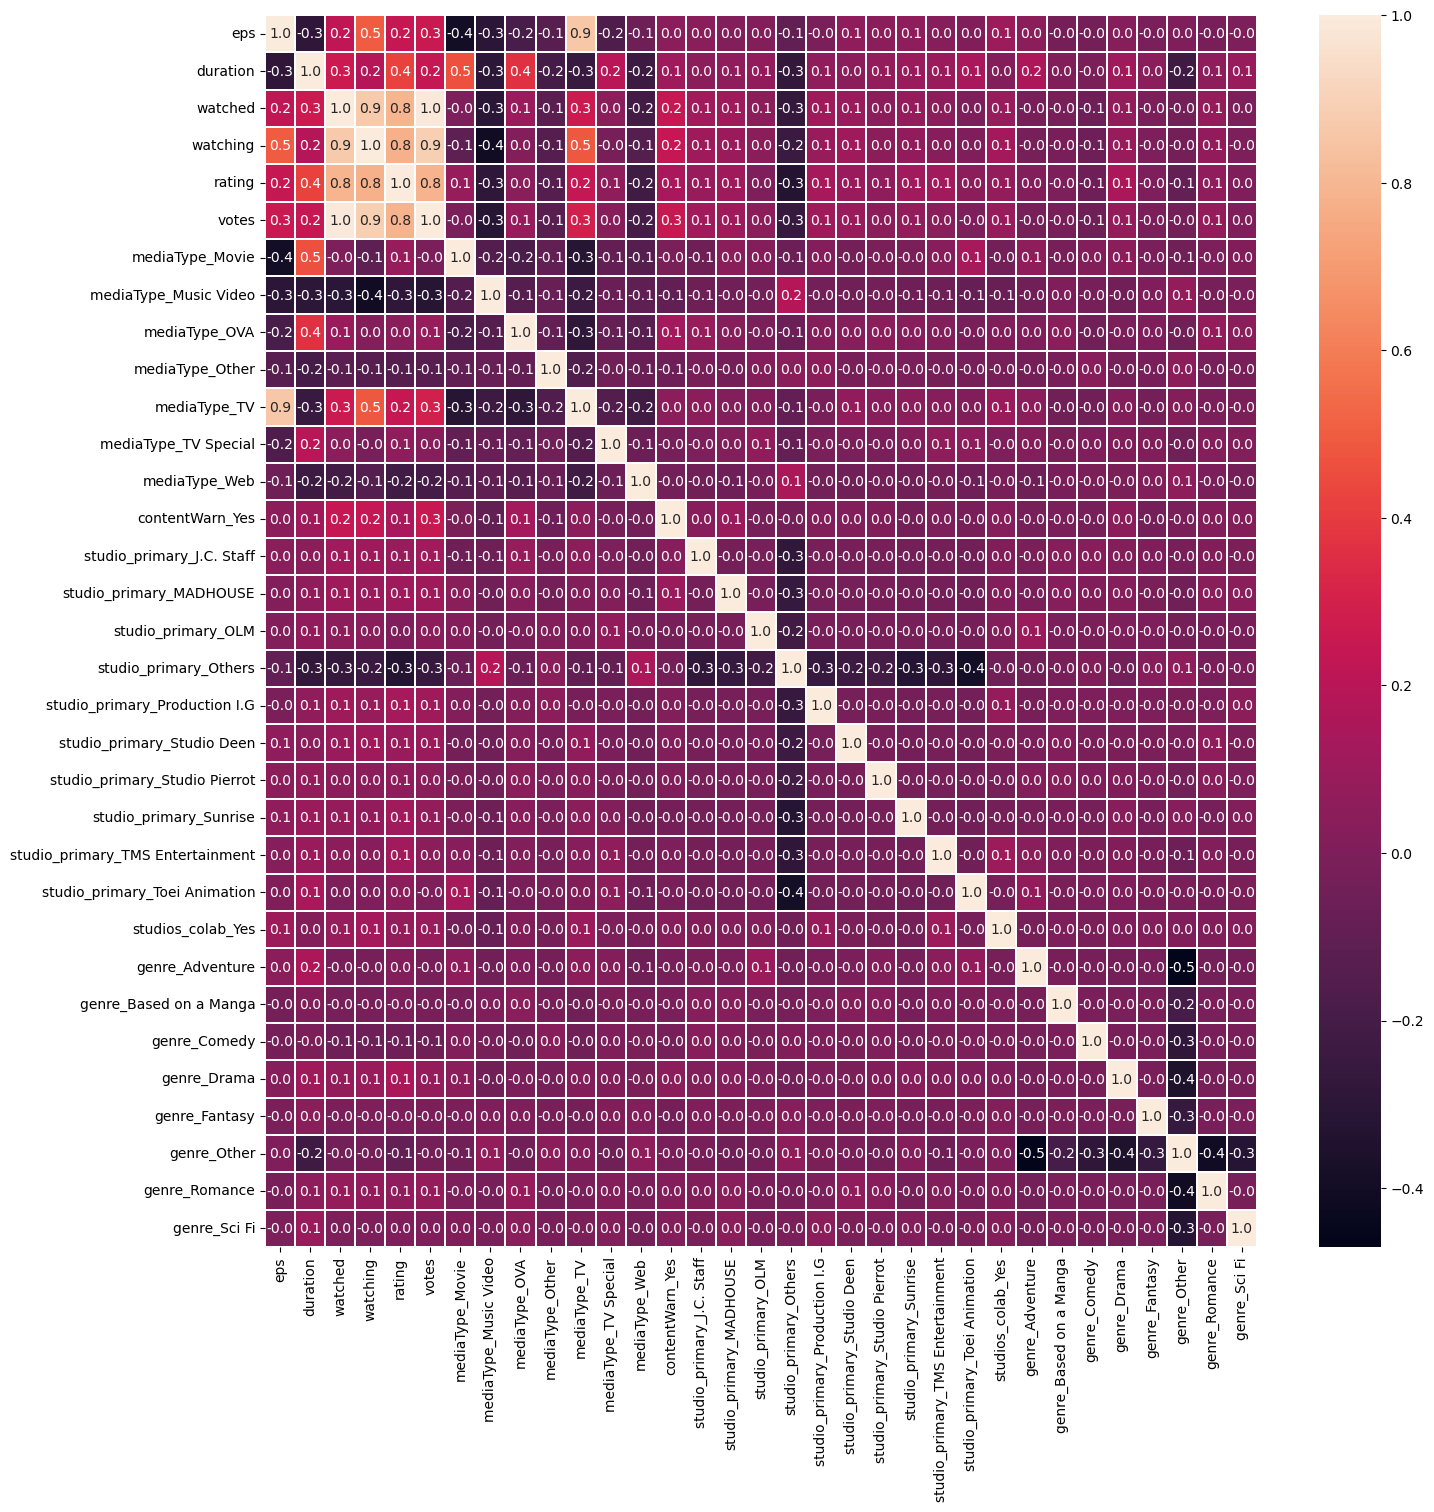

In [118]:
#correlation map
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '1.0001f',ax=ax)

### Model Building

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming 'rating' is the target variable and the DataFrame is 'df'
X = df_encoded.drop('rating', axis=1)  # Features
y = df_encoded[['rating']]  # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply MinMaxScaler to the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions on training set
train_predictions = model.predict(X_train_scaled)

# Predictions on testing set
test_predictions = model.predict(X_test_scaled)

# Metrics for training set
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_r2 = r2_score(y_train, train_predictions)

# Metrics for testing set
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

# Print the metrics
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print("\nTesting RMSE:", test_rmse)
print("Testing R^2:", test_r2)

Training RMSE: 0.3719963926097998
Training R^2: 0.7569398751594768

Testing RMSE: 0.36175151790112264
Testing R^2: 0.7815501593149787


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train_scaled, y_train)

# Predictions on training set
tree_train_predictions = tree_model.predict(X_train_scaled)

# Predictions on testing set
tree_test_predictions = tree_model.predict(X_test_scaled)

# Metrics for training set
tree_train_rmse = mean_squared_error(y_train, tree_train_predictions, squared=False)
tree_train_r2 = r2_score(y_train, tree_train_predictions)

# Metrics for testing set
tree_test_rmse = mean_squared_error(y_test, tree_test_predictions, squared=False)
tree_test_r2 = r2_score(y_test, tree_test_predictions)

# Print the metrics for Decision Tree Regression
print("Decision Tree - Training RMSE:", tree_train_rmse)
print("Decision Tree - Training R^2:", tree_train_r2)
print("\nDecision Tree - Testing RMSE:", tree_test_rmse)
print("Decision Tree - Testing R^2:", tree_test_r2)

Decision Tree - Training RMSE: 0.07283219507710081
Decision Tree - Training R^2: 0.9906828506217648

Decision Tree - Testing RMSE: 0.49919960700700816
Decision Tree - Testing R^2: 0.5840132691641167


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regression model with pruning
pruned_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the pruned model
pruned_tree_model.fit(X_train_scaled, y_train)

# Predictions on training set
pruned_tree_train_predictions = pruned_tree_model.predict(X_train_scaled)

# Predictions on testing set
pruned_tree_test_predictions = pruned_tree_model.predict(X_test_scaled)

# Metrics for training set with pruning
pruned_tree_train_rmse = mean_squared_error(y_train, pruned_tree_train_predictions, squared=False)
pruned_tree_train_r2 = r2_score(y_train, pruned_tree_train_predictions)

# Metrics for testing set with pruning
pruned_tree_test_rmse = mean_squared_error(y_test, pruned_tree_test_predictions, squared=False)
pruned_tree_test_r2 = r2_score(y_test, pruned_tree_test_predictions)

# Print the metrics for Decision Tree Regression with pruning
print("Pruned Decision Tree - Training RMSE:", pruned_tree_train_rmse)
print("Pruned Decision Tree - Training R^2:", pruned_tree_train_r2)
print("\nPruned Decision Tree - Testing RMSE:", pruned_tree_test_rmse)
print("Pruned Decision Tree - Testing R^2:", pruned_tree_test_r2)


Pruned Decision Tree - Training RMSE: 0.3832492664459046
Pruned Decision Tree - Training R^2: 0.742012345342854

Pruned Decision Tree - Testing RMSE: 0.4010888780818073
Pruned Decision Tree - Testing R^2: 0.7314579826771546


###  RandomForest :

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regression model with tuned hyperparameters
rf_model_tuned = RandomForestRegressor(
    random_state=42,
    n_estimators=200,       # Increase the number of trees
    max_depth=10,           # Limit the depth of each tree
    min_samples_split=5,    # Increase the minimum samples required to split an internal node
    min_samples_leaf=2      # Increase the minimum samples required to be at a leaf node
)

# Train the tuned model
rf_model_tuned.fit(X_train_scaled, y_train)

# Predictions on training set
rf_train_predictions_tuned = rf_model_tuned.predict(X_train_scaled)

# Predictions on testing set
rf_test_predictions_tuned = rf_model_tuned.predict(X_test_scaled)

# Metrics for training set with tuned hyperparameters
rf_train_rmse_tuned = mean_squared_error(y_train, rf_train_predictions_tuned, squared=False)
rf_train_r2_tuned = r2_score(y_train, rf_train_predictions_tuned)

# Metrics for testing set with tuned hyperparameters
rf_test_rmse_tuned = mean_squared_error(y_test, rf_test_predictions_tuned, squared=False)
rf_test_r2_tuned = r2_score(y_test, rf_test_predictions_tuned)

# Print the metrics for Random Forest Regression with tuned hyperparameters
print("Tuned Random Forest - Training RMSE:", rf_train_rmse_tuned)
print("Tuned Random Forest - Training R^2:", rf_train_r2_tuned)
print("\nTuned Random Forest - Testing RMSE:", rf_test_rmse_tuned)
print("Tuned Random Forest - Testing R^2:", rf_test_r2_tuned)


Tuned Random Forest - Training RMSE: 0.2770851541007851
Tuned Random Forest - Training R^2: 0.86514632858622

Tuned Random Forest - Testing RMSE: 0.3616889051738446
Tuned Random Forest - Testing R^2: 0.7816257723030973


## Boosting Models

### Ada Boosting :

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an AdaBoost Regression model
adaboost_model = AdaBoostRegressor(random_state=42)

# Train the model
adaboost_model.fit(X_train_scaled, y_train)

# Predictions on training set
adaboost_train_predictions = adaboost_model.predict(X_train_scaled)

# Predictions on testing set
adaboost_test_predictions = adaboost_model.predict(X_test_scaled)

# Metrics for training set
adaboost_train_rmse = mean_squared_error(y_train, adaboost_train_predictions, squared=False)
adaboost_train_r2 = r2_score(y_train, adaboost_train_predictions)

# Metrics for testing set
adaboost_test_rmse = mean_squared_error(y_test, adaboost_test_predictions, squared=False)
adaboost_test_r2 = r2_score(y_test, adaboost_test_predictions)

# Print the metrics for AdaBoost Regression
print("AdaBoost - Training RMSE:", adaboost_train_rmse)
print("AdaBoost - Training R^2:", adaboost_train_r2)
print("\nAdaBoost - Testing RMSE:", adaboost_test_rmse)
print("AdaBoost - Testing R^2:", adaboost_test_r2)

AdaBoost - Training RMSE: 0.37636910370510684
AdaBoost - Training R^2: 0.7511920863789425

AdaBoost - Testing RMSE: 0.37591993474584795
AdaBoost - Testing R^2: 0.7641033782738095


### Gradient Boosting :

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Gradient Boosting Regression model
gradboost_model = GradientBoostingRegressor(random_state=42)

# Train the model
gradboost_model.fit(X_train_scaled, y_train)

# Predictions on training set
gradboost_train_predictions = gradboost_model.predict(X_train_scaled)

# Predictions on testing set
gradboost_test_predictions = gradboost_model.predict(X_test_scaled)

# Metrics for training set
gradboost_train_rmse = mean_squared_error(y_train, gradboost_train_predictions, squared=False)
gradboost_train_r2 = r2_score(y_train, gradboost_train_predictions)

# Metrics for testing set
gradboost_test_rmse = mean_squared_error(y_test, gradboost_test_predictions, squared=False)
gradboost_test_r2 = r2_score(y_test, gradboost_test_predictions)

# Print the metrics for Gradient Boosting Regression
print("Gradient Boosting - Training RMSE:", gradboost_train_rmse)
print("Gradient Boosting - Training R^2:", gradboost_train_r2)
print("\nGradient Boosting - Testing RMSE:", gradboost_test_rmse)
print("Gradient Boosting - Testing R^2:", gradboost_test_r2)

Gradient Boosting - Training RMSE: 0.3328688164619492
Gradient Boosting - Training R^2: 0.8053822337580894

Gradient Boosting - Testing RMSE: 0.3504827638134556
Gradient Boosting - Testing R^2: 0.7949478449529711


### xg boosting :

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost Regression model
xgboost_model = XGBRegressor(random_state=42)

# Train the model
xgboost_model.fit(X_train_scaled, y_train)

# Predictions on training set
xgboost_train_predictions = xgboost_model.predict(X_train_scaled)

# Predictions on testing set
xgboost_test_predictions = xgboost_model.predict(X_test_scaled)

# Metrics for training set
xgboost_train_rmse = mean_squared_error(y_train, xgboost_train_predictions, squared=False)
xgboost_train_r2 = r2_score(y_train, xgboost_train_predictions)

# Metrics for testing set
xgboost_test_rmse = mean_squared_error(y_test, xgboost_test_predictions, squared=False)
xgboost_test_r2 = r2_score(y_test, xgboost_test_predictions)

# Print the metrics for XGBoost Regression
print("XGBoost - Training RMSE:", xgboost_train_rmse)
print("XGBoost - Training R^2:", xgboost_train_r2)
print("\nXGBoost - Testing RMSE:", xgboost_test_rmse)
print("XGBoost - Testing R^2:", xgboost_test_r2)

XGBoost - Training RMSE: 0.2044007378039657
XGBoost - Training R^2: 0.9266160342088957

XGBoost - Testing RMSE: 0.3629449171599002
XGBoost - Testing R^2: 0.7801064728100954


In [ ]:
import pandas as pd

# Define the results
results_data = {
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Pruned Decision Tree', 'Tuned Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost'],
    'Training RMSE': [0.37199,0.07283 , 0.38324,0.277085 , 0.376369,  0.33286, 0.20440],
    'Training R^2': [0.75693, 0.99068 , 0.742012,0.86514 ,0.75119 , 0.805382,0.92661 ],
    'Testing RMSE': [0.36175,0.49919 ,  0.401088,0.36168 ,0.37591 ,0.35048 , 0.3629 ],
    'Testing R^2': [0.781550,0.58401 ,0.731457 ,0.781625 , 0.764103,0.794947 ,0.78010 ]
}

# Create a DataFrame
results_df = pd.DataFrame(results_data)

# Display the summary table
results_df

,Algorithm,Training RMSE,Training R^2,Testing RMSE,Testing R^2
0,Linear Regression,0.371990,0.756930,0.361750,0.781550
1,Decision Tree,0.072830,0.990680,0.499190,0.584010
2,Pruned Decision Tree,0.383240,0.742012,0.401088,0.731457
3,Tuned Random Forest,0.277085,0.865140,0.361680,0.781625
4,AdaBoost,0.376369,0.751190,0.375910,0.764103
5,Gradient Boosting,0.332860,0.805382,0.350480,0.794947
6,XGBoost,0.204400,0.926610,0.362900,0.780100


### GBoost appears to be the best model as it demonstrates a good balance between training and testing performance, with low Root  Mean Squared Error (RMSE) and high R^2 scores on both sets.

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have already trained a Gradient Boosting model called 'grad_boost_model'
# If not, replace it with the actual variable name of your trained model

# Fit the model on your training data
gradboost_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gradboost_model.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                             Feature  Importance
2                            watched    0.534060
3                           watching    0.309180
1                           duration    0.090280
0                                eps    0.012217
13                    contentWarn_No    0.005654
18                studio_primary_OLM    0.005139
6                    mediaType_Movie    0.004853
8                      mediaType_OVA    0.004649
19             studio_primary_Others    0.004572
4                              votes    0.004338
12                     mediaType_Web    0.003829
10                      mediaType_TV    0.003728
32                       genre_Drama    0.003587
24  studio_primary_TMS Entertainment    0.003190
7              mediaType_Music Video    0.003004
14                   contentWarn_Yes    0.001553
5              mediaType_DVD Special    0.001543
20     studio_primary_Production I.G    0.001439
15       studio_primary_A-1 Pictures    0.000717
27                 s

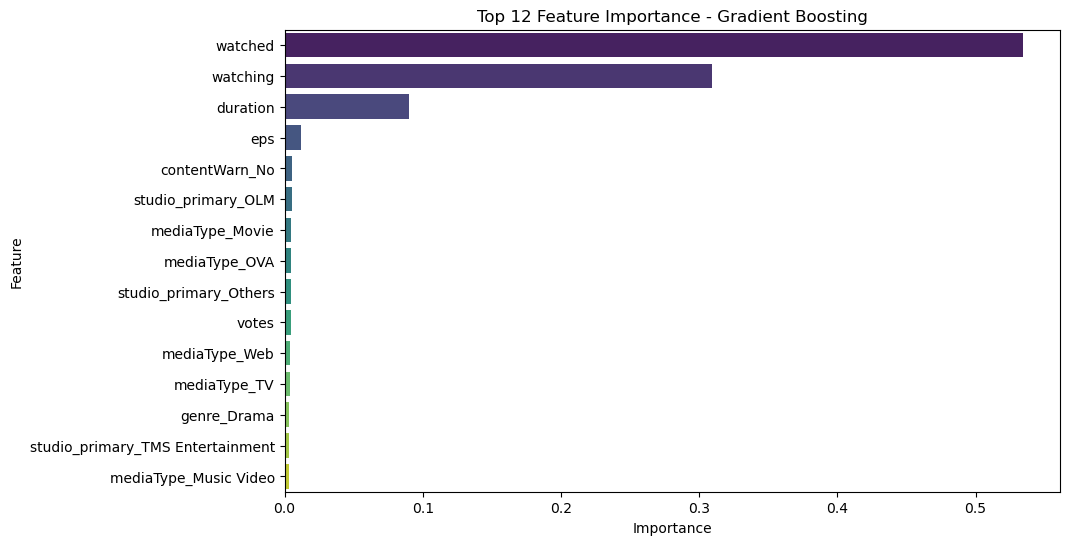

In [127]:
# Assuming 'importance_df' contains the DataFrame with feature importances
top_features = importance_df.nlargest(15, 'Importance')  # Selecting the top 12 features

# Plotting feature importances for the top 12 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 12 Feature Importance - Gradient Boosting')
plt.show()